In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import random

In [10]:
# function to find n-bit binary expansion of x given n.
def binary_expansion(x, n):
    result = np.zeros(n)
    tmp = 0
    for i in range(n-1):
        x -= 1/(2**(i)) * tmp
        if x >= 1/(2**(i+1)):
            tmp = 1
        else:
            tmp = 0
        result[i+1]  = tmp
    return result

In [3]:
def generate_numbers(degree):
    # Generate 10 random numbers between 0 and 1
    nums = [random.uniform(0, 1) for _ in range(degree)]
    
    # Normalize the numbers such that their sum is 1
    norm_factor = sum(nums)
    nums = [num / norm_factor for num in nums]
    
    # Randomly assign positive or negative signs
    signed_nums = [num * random.choice([-1, 1]) for num in nums]
    numtake = [0]
    for num in signed_nums:
        numtake.append(round(num,2))
    return numtake

def random_polynomial_coefficients(degrees):
    coefficients = []
    for d in degrees:
        coeff = generate_numbers(d)
        coefficients.append(coeff)
    return coefficients

degrees = [5, 10, 15, 25, 30]
polynomial_coefficients = random_polynomial_coefficients(degrees)
print(polynomial_coefficients)

[[0, 0.21, -0.14, 0.19, -0.18, 0.28], [0, -0.15, -0.03, -0.02, -0.0, 0.04, 0.1, -0.17, 0.17, 0.15, -0.17], [0, 0.03, -0.04, 0.06, -0.09, 0.11, -0.04, -0.12, 0.14, -0.05, 0.01, 0.03, 0.1, 0.03, 0.13, 0.02], [0, -0.06, -0.07, -0.03, 0.02, 0.05, 0.06, -0.01, 0.02, -0.06, 0.02, 0.01, -0.07, 0.05, -0.05, -0.06, 0.06, -0.02, 0.02, 0.04, 0.03, -0.05, -0.02, 0.05, 0.05, -0.01], [0, -0.06, 0.06, -0.03, -0.04, -0.03, -0.05, 0.02, 0.05, -0.03, -0.0, 0.03, -0.06, 0.01, 0.05, 0.0, -0.03, 0.01, -0.01, -0.03, -0.03, -0.03, -0.06, -0.02, 0.03, 0.06, -0.01, 0.06, 0.04, 0.0, -0.05]]


In [4]:
def generate_data(coefficients, samples=1000, noise_scale=0.01):
    X = np.random.rand(samples)
    y = generate_polynomial(coefficients, X)
    #+ np.random.normal(scale=noise_scale, size=samples)
    return train_test_split(X, y, test_size=0.2, random_state=42)
def generate_polynomial(coefficients, x):
    return np.sum([c * x**i for i, c in enumerate(coefficients)], axis=0)

In [5]:
def create_shallow_network(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim = neurons, activation='relu'))
    model.add(Dense((layers-1) * neurons, activation='relu'))
    model.add(Dense(1))
    return model

def create_deep_network(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=neurons, activation='relu'))
    for i in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    return model

In [35]:
# train shallow and deep nn when epsilon = 0.01 and p increases
epsilon = 0.01
shallow_train = []
shallow_test = []
deep_train = []
deep_test = []

for coefficients in polynomial_coefficients:
    p = len(coefficients) - 1
    n = int(np.ceil(np.log2(p / 0.01))) + 1
    X_train, X_test, y_train, y_test = generate_data(coefficients)
    x_train = []
    for i in X_train:
        n_exp = binary_expansion(i, n)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = binary_expansion(i, n)
        x_test.append(n_exp)
    x_test = np.array(x_test)
    
    shallow_model = create_shallow_network(p, n)
    shallow_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    shallow_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    ytrain_pred = shallow_model.predict(x_train)
    shallow_mse_train = mean_absolute_error(y_train, ytrain_pred)
    shallow_train.append(shallow_mse_train)
    
    ytest_pred = shallow_model.predict(x_test)
    shallow_mse_test = mean_absolute_error(y_test, ytest_pred)
    shallow_test.append(shallow_mse_test)

    deep_model = create_deep_network(p, n)
    deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    deep_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    ytrain_pred = deep_model.predict(x_train)
    deep_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deep_train.append(deep_mse_train)
    
    ytest_pred = deep_model.predict(x_test)
    deep_mse_test = mean_absolute_error(y_test, ytest_pred)
    deep_test.append(deep_mse_test)


7/7 [==============================] - 0s 1ms/step


In [9]:
# show the structure of deep and shallow neural networks
for coefficients in polynomial_coefficients:
    p = len(coefficients) - 1
    n = int(np.ceil(np.log2(p / 0.01))) + 1
    X_train, X_test, y_train, y_test = generate_data(coefficients)
    x_train = []
    for i in X_train:
        n_exp = binary_expansion(i, n)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = binary_expansion(i, n)
        x_test.append(n_exp)
    x_test = np.array(x_test)
    
    shallow_model = create_shallow_network(p, n)
    shallow_model.summary()
    deep_model = create_deep_network(p, n)
    deep_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 10)                110       
                                                                 
 dense_121 (Dense)           (None, 40)                440       
                                                                 
 dense_122 (Dense)           (None, 1)                 41        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 10)                110       
                                                                 
 dense_124 (Dense)           (No

 dense_162 (Dense)           (None, 13)                182       
                                                                 
 dense_163 (Dense)           (None, 312)               4368      
                                                                 
 dense_164 (Dense)           (None, 1)                 313       
                                                                 
Total params: 4,863
Trainable params: 4,863
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 13)                182       
                                                                 
 dense_166 (Dense)           (None, 13)                182       
                                                                 
 dense_167 (Dense)           (None, 13)            

 dense_214 (Dense)           (None, 13)                182       
                                                                 
 dense_215 (Dense)           (None, 13)                182       
                                                                 
 dense_216 (Dense)           (None, 13)                182       
                                                                 
 dense_217 (Dense)           (None, 13)                182       
                                                                 
 dense_218 (Dense)           (None, 13)                182       
                                                                 
 dense_219 (Dense)           (None, 13)                182       
                                                                 
 dense_220 (Dense)           (None, 13)                182       
                                                                 
 dense_221 (Dense)           (None, 13)                182       
          

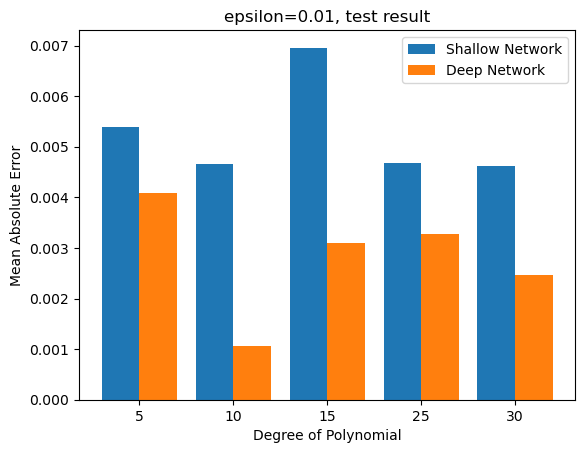

In [39]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_test, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_test, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, test result")
plt.legend()
plt.show()

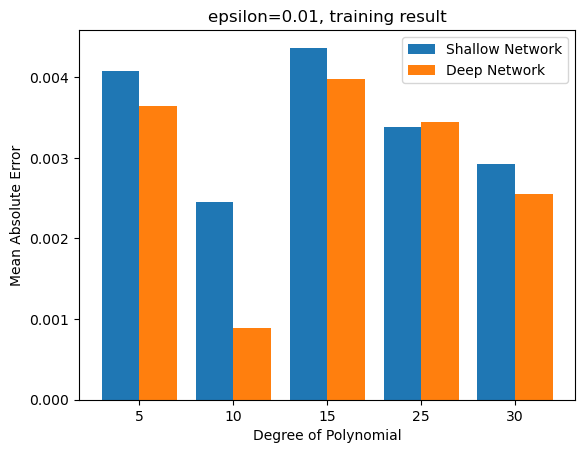

In [40]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_train, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_train, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, training result")
plt.legend()
plt.show()

In [41]:
# train shallow and deep nn when epsilon = 0.05 and p increases
epsilon = 0.05
shallow_train = []
shallow_test = []
deep_train = []
deep_test = []

for coefficients in polynomial_coefficients:
    p = len(coefficients) - 1
    n = int(np.ceil(np.log2(p / 0.05))) + 1
    X_train, X_test, y_train, y_test = generate_data(coefficients)
    x_train = []
    for i in X_train:
        n_exp = binary_expansion(i, n)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = binary_expansion(i, n)
        x_test.append(n_exp)
    x_test = np.array(x_test)
    
    shallow_model = create_shallow_network(p, n)
    shallow_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error')
    shallow_model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)
    
    ytrain_pred = shallow_model.predict(x_train)
    shallow_mse_train = mean_absolute_error(y_train, ytrain_pred)
    shallow_train.append(shallow_mse_train)
    
    ytest_pred = shallow_model.predict(x_test)
    shallow_mse_test = mean_absolute_error(y_test, ytest_pred)
    shallow_test.append(shallow_mse_test)

    deep_model = create_deep_network(p, n)
    deep_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error')
    deep_model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)
    
    ytrain_pred = deep_model.predict(x_train)
    deep_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deep_train.append(deep_mse_train)
    
    ytest_pred = deep_model.predict(x_test)
    deep_mse_test = mean_absolute_error(y_test, ytest_pred)
    deep_test.append(deep_mse_test)

7/7 [==============================] - 0s 2ms/step


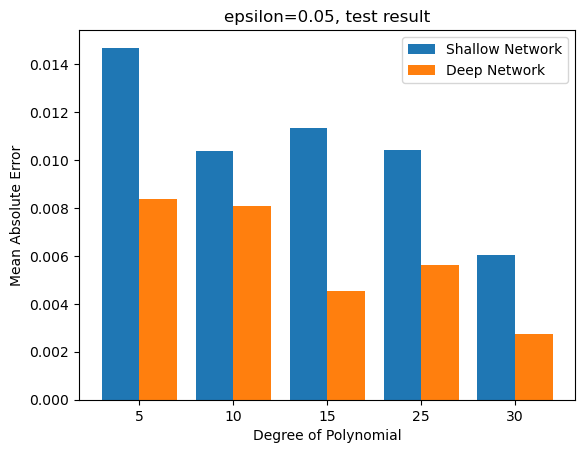

In [45]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_test, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_test, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.05, test result")
plt.legend()
plt.show()

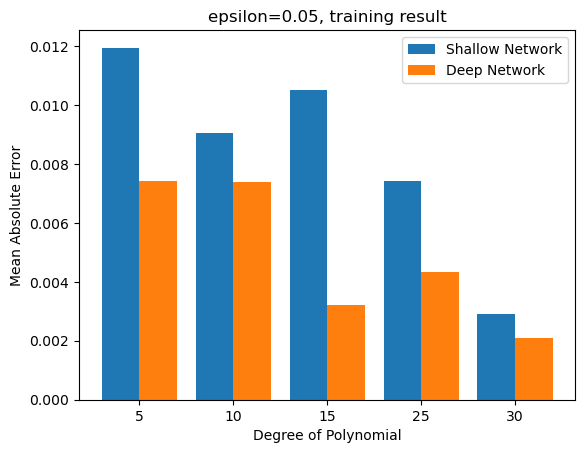

In [46]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_train, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_train, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.05, training result")
plt.legend()
plt.show()

In [48]:
# create a deep neural network with 2x number of hidden layers
def create_deeper_network(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=neurons, activation='relu'))
    for i in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    return model

In [49]:
# compare deep and deeper nn model for polynomial function approximation
epsilon = 0.01
deeper_train = []
deeper_test = []
deep_train = []
deep_test = []

for coefficients in polynomial_coefficients:
    p = len(coefficients) - 1
    n = int(np.ceil(np.log2(p / 0.01))) + 1
    X_train, X_test, y_train, y_test = generate_data(coefficients)
    x_train = []
    for i in X_train:
        n_exp = binary_expansion(i, n)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = binary_expansion(i, n)
        x_test.append(n_exp)
    x_test = np.array(x_test)
    
    deeper_model = create_deeper_network(p, n)
    deeper_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    deeper_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    ytrain_pred = deeper_model.predict(x_train)
    deeper_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deeper_train.append(deeper_mse_train)
    
    ytest_pred = deeper_model.predict(x_test)
    deeper_mse_test = mean_absolute_error(y_test, ytest_pred)
    deeper_test.append(shallow_mse_test)

    deep_model = create_deep_network(p, n)
    deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    deep_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    ytrain_pred = deep_model.predict(x_train)
    deep_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deep_train.append(deep_mse_train)
    
    ytest_pred = deep_model.predict(x_test)
    deep_mse_test = mean_absolute_error(y_test, ytest_pred)
    deep_test.append(deep_mse_test)


7/7 [==============================] - 0s 1ms/step


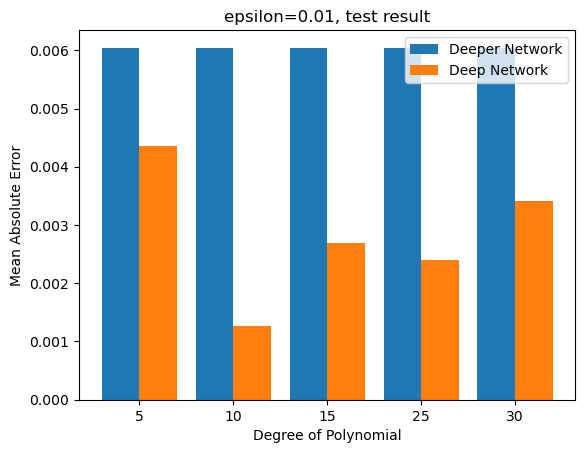

In [50]:
plt.bar(np.arange(len(degrees)) - 0.2, deeper_test, width=0.4, label='Deeper Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_test, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, test result")
plt.legend()
plt.show()

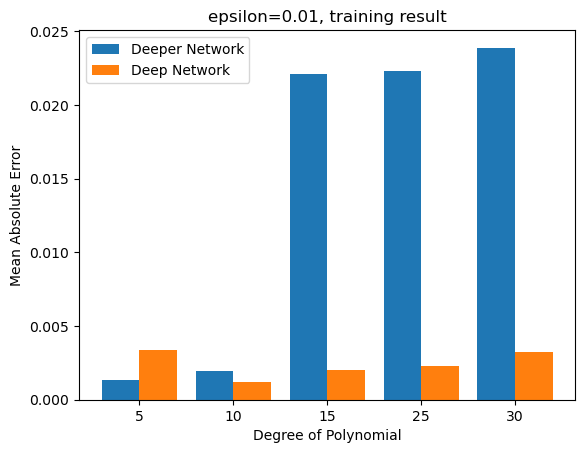

In [51]:
plt.bar(np.arange(len(degrees)) - 0.2, deeper_train, width=0.4, label='Deeper Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_train, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, training result")
plt.legend()
plt.show()

In [146]:
# get n-bit multivariate binary expansion of x, given n and d (not used)
def multivariable_binary_expansion(x, n, d):
    result = np.zeros([d, n])
    for j in range(d):
        x_d  = x[j]
        tmp = 0
        for i in range(n-1):
            x_d -= 1/(2**(i)) * tmp
            if x_d >= 1/(2**(i+1)):
                tmp = 1
            else:
                tmp = 0
            result[j, i]  = tmp
    return result

print(multivariable_binary_expansion([0.16798, 0.4567], 7, 2))

[[0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0.]]


In [160]:
# generate random weights, then generate 1000 x and corresponding y
def generate_data(p, d, num_samples):
    # Generate random weights with L1 norm equal to 1
    W = []
    for _ in range(p):
        w = np.random.rand(d)
        w /= np.sum(w)
        W.append(w)
    W = np.array(W)
    
    # Generate random input samples
    X = np.random.rand(num_samples, d)
    
    # Compute the product of p linear functions
    y = np.prod(np.dot(X, W.T), axis=1, keepdims=True)
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

# train shallow and deep nn when p is fixed and d increases
shallow_train = []
shallow_test = []
deep_train = []
deep_test = []


epsilon = 0.01
dimension = [5, 10, 15, 20, 25]
p = 10
for d in dimension: 
    X_train, X_test, y_train, y_test = generate_data(p, d, 1000)


    n = int(np.ceil(np.log(p * d / epsilon))) + 1

    x_train = []
    for i in X_train:
        n_exp = multivariable_binary_expansion(i, n, d)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = multivariable_binary_expansion(i, n, d)
        x_test.append(n_exp)
    x_test = np.array(x_test)

    num_units = d*n
    deep_model = Sequential()
    '''
    model.add(Conv1D(num_units, input_shape=(d, n), kernel_size = 2, activation='relu'))
    for i in range(num_layers - 1):
        model.add(Conv1D(num_units, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1))
    '''
    deep_model.add(Dense(num_units, input_dim=d, activation='relu'))
    for i in range(p - 1):
        deep_model.add(Dense(num_units, activation='relu'))
    deep_model.add(Dense(1))

    shallow_model = Sequential()
    shallow_model.add(Dense(num_units, input_dim=d, activation='relu'))
    shallow_model.add(Dense((p - 1)*num_units, activation='relu'))
    shallow_model.add(Dense(1))

    deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    deep_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

    shallow_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    shallow_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
    
    ytrain_pred = shallow_model.predict(X_train)
    shallow_mse_train = mean_absolute_error(y_train, ytrain_pred)
    shallow_train.append(shallow_mse_train)
    
    yest_pred = shallow_model.predict(X_test)
    shallow_mse_test = mean_absolute_error(y_test, ytest_pred)
    shallow_test.append(shallow_mse_test)
    
    ytrain_pred = deep_model.predict(X_train)
    deep_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deep_train.append(deep_mse_train)
    
    ytest_pred = deep_model.predict(X_test)
    deep_mse_test = mean_absolute_error(y_test, ytest_pred)
    deep_test.append(deep_mse_test)


7/7 [==============================] - 0s 5ms/step


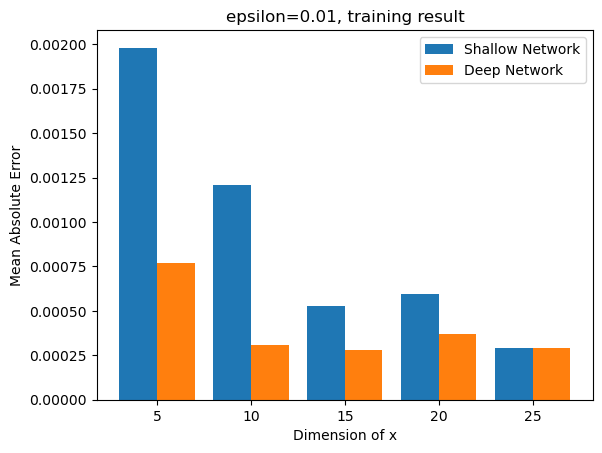

In [163]:
plt.bar(np.arange(len(dimension)) - 0.2, shallow_train, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(dimension)) + 0.2, deep_train, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(dimension)), dimension)
plt.xlabel("Dimension of x")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, training result")
plt.legend()
plt.show()

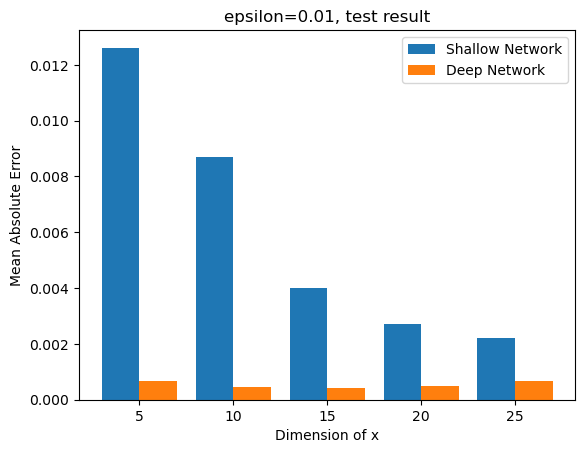

In [165]:
plt.bar(np.arange(len(dimension)) - 0.2, shallow_test, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(dimension)) + 0.2, deep_test, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(dimension)), dimension)
plt.xlabel("Dimension of x")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, test result")
plt.legend()
plt.show()

In [166]:
# train shallow and deep nn when d is fixed and p increases
shallow_train = []
shallow_test = []
deep_train = []
deep_test = []

epsilon = 0.01
dimension = 10
degrees = [5, 10, 15, 20, 25]
for p in degrees: 
    X_train, X_test, y_train, y_test = generate_data(p, d, 1000)


    n = int(np.ceil(np.log(p * d / epsilon))) + 1

    x_train = []
    for i in X_train:
        n_exp = multivariable_binary_expansion(i, n, d)
        x_train.append(n_exp)
    x_train = np.array(x_train)
    x_test = []
    for i in X_test:
        n_exp = multivariable_binary_expansion(i, n, d)
        x_test.append(n_exp)
    x_test = np.array(x_test)

    num_units = d*n
    deep_model = Sequential()
    '''
    model.add(Conv1D(num_units, input_shape=(d, n), kernel_size = 2, activation='relu'))
    for i in range(num_layers - 1):
        model.add(Conv1D(num_units, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1))
    '''
    deep_model.add(Dense(num_units, input_dim=d, activation='relu'))
    for i in range(p - 1):
        deep_model.add(Dense(num_units, activation='relu'))
    deep_model.add(Dense(1))

    shallow_model = Sequential()
    shallow_model.add(Dense(num_units, input_dim=d, activation='relu'))
    shallow_model.add(Dense((p - 1)*num_units, activation='relu'))
    shallow_model.add(Dense(1))

    deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    deep_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

    shallow_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    shallow_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
    
    ytrain_pred = shallow_model.predict(X_train)
    shallow_mse_train = mean_absolute_error(y_train, ytrain_pred)
    shallow_train.append(shallow_mse_train)
    
    yest_pred = shallow_model.predict(X_test)
    shallow_mse_test = mean_absolute_error(y_test, ytest_pred)
    shallow_test.append(shallow_mse_test)
    
    ytrain_pred = deep_model.predict(X_train)
    deep_mse_train = mean_absolute_error(y_train, ytrain_pred)
    deep_train.append(deep_mse_train)
    
    ytest_pred = deep_model.predict(X_test)
    deep_mse_test = mean_absolute_error(y_test, ytest_pred)
    deep_test.append(deep_mse_test)


7/7 [==============================] - 0s 11ms/step


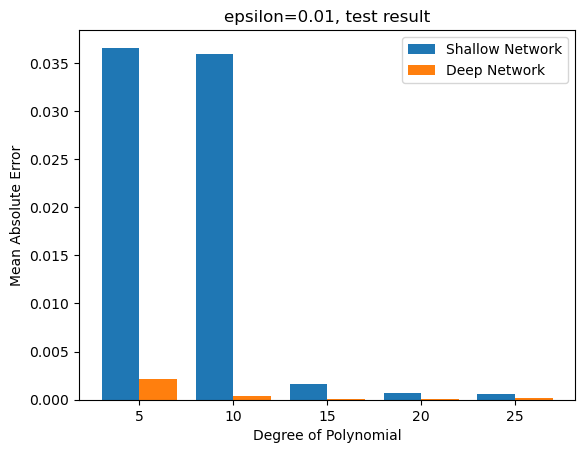

In [176]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_test, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_test, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, test result")
plt.legend()
plt.show()

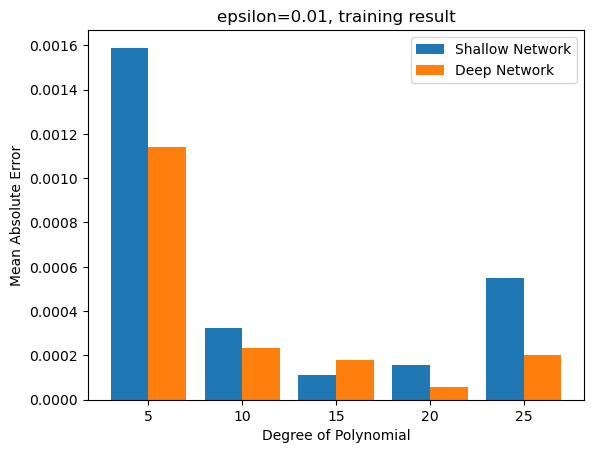

In [177]:
plt.bar(np.arange(len(degrees)) - 0.2, shallow_train, width=0.4, label='Shallow Network')
plt.bar(np.arange(len(degrees)) + 0.2, deep_train, width=0.4, label='Deep Network')
plt.xticks(np.arange(len(degrees)), degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Absolute Error")
plt.title("epsilon=0.01, training result")
plt.legend()
plt.show()